In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
%matplotlib widget

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../Forecasting/')
from plot_correlation import plot_correlation

In [2]:
pca_components = 50

In [3]:
45*15/60

11.25

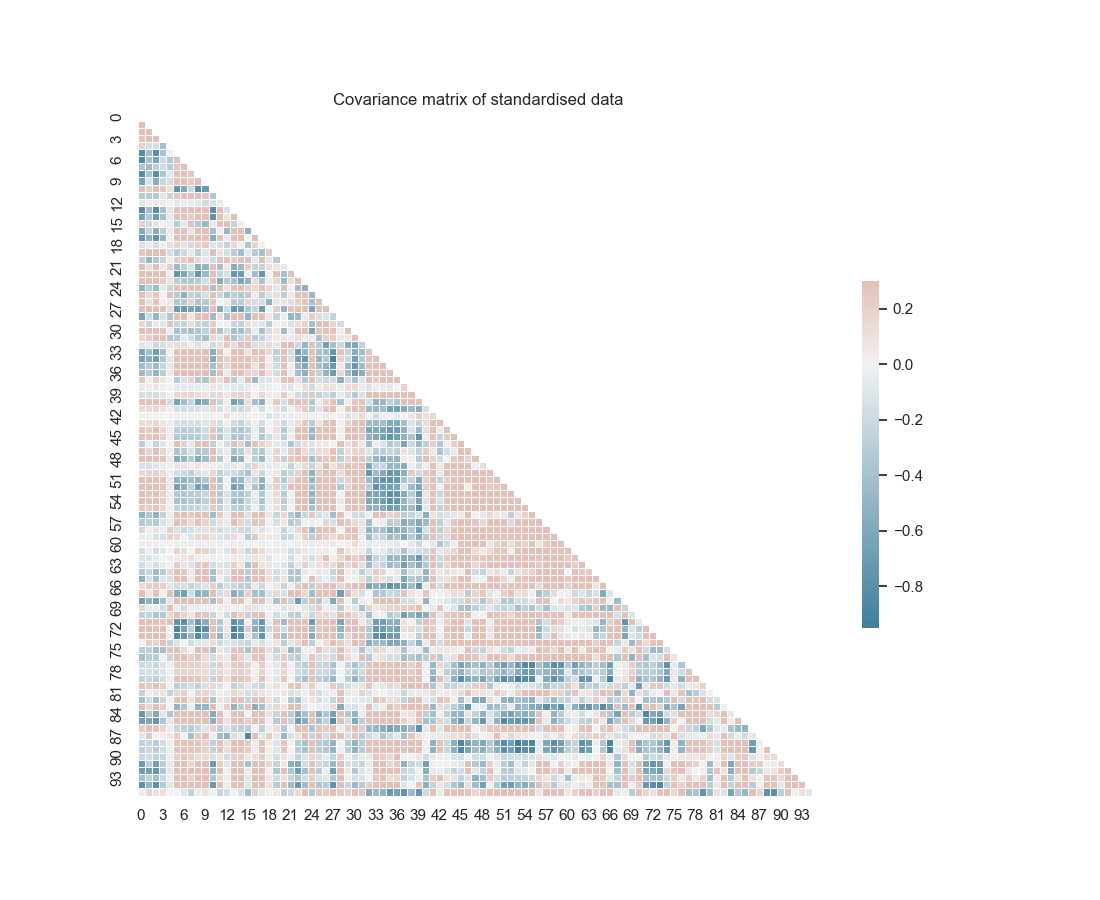

Text(0, 0.5, 'Explained Variaces')

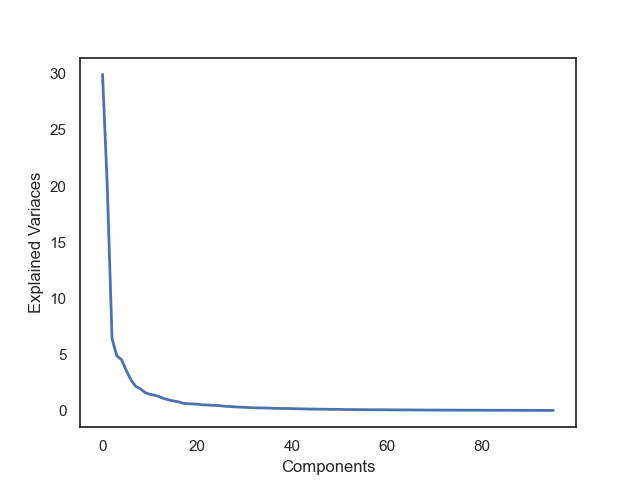

In [11]:
X = np.load(f'../Data/dense_nn_2020-01-01_volume_param_dummies.npy')[20,:96,:].T
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=96)
pca.fit(X)
plot_correlation(X, names=np.arange(np.shape(X)[1]), quarter='Covariance matrix of standardised data')
plt.figure()
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')

(0.0, 2.0)

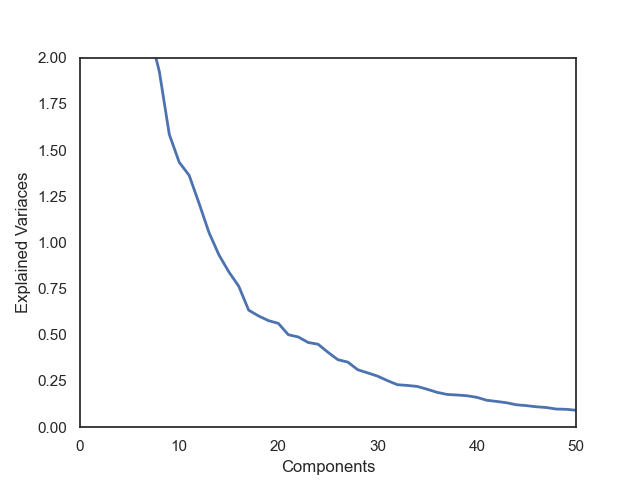

In [12]:
plt.figure()
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.xlim([0,pca_components])
plt.ylim([0,2])

In [ ]:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

# 10 samples with 5 features
X = np.load(f'../Data/dense_nn_2020-01-01_volume_param.npy')[0,:,:].T

X = StandardScaler().fit_transform(X)

model = PCA(n_components=pca_components).fit(X)
X_pc = model.transform(X)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = np.arange(2*96)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,135
1,PC1,89
2,PC2,80
3,PC3,65
4,PC4,69
5,PC5,9
6,PC6,13
7,PC7,83
8,PC8,45
9,PC9,64


In [ ]:
print('Unique values in the most important values: ', len(np.sort(df[1].unique())))

print('Values list: ', np.sort(df[1].unique()))

Unique values in the most important values:  36
Values list:  [  0   4   9  12  13  14  16  17  20  21  22  24  27  28  29  38  45  49
  60  63  64  65  69  70  73  77  80  81  82  83  85  86  89  93  95 135]


In [ ]:
(135-96)*1/4

9.75

C:\Users\riczi\AppData\Local\Temp\ipykernel_24608\769937471.py:2: RuntimeWarning: More than 20 figures have been opened. Paper_Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


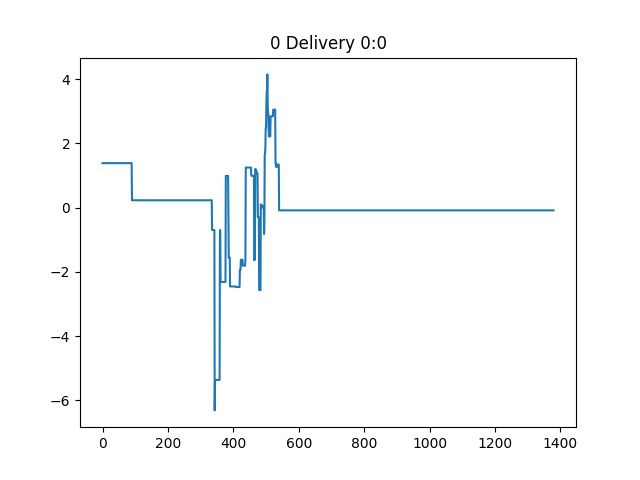

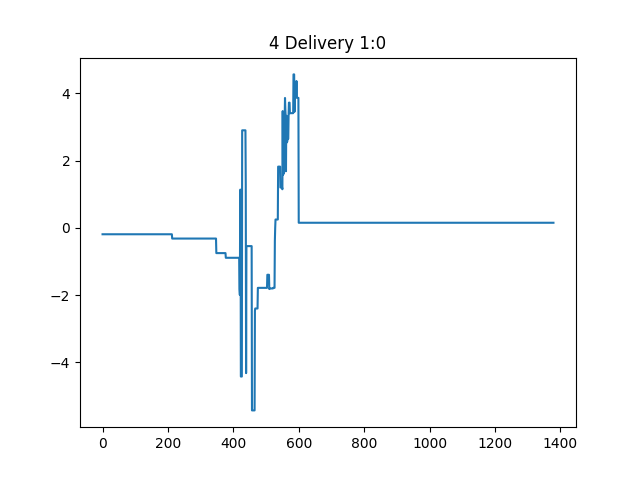

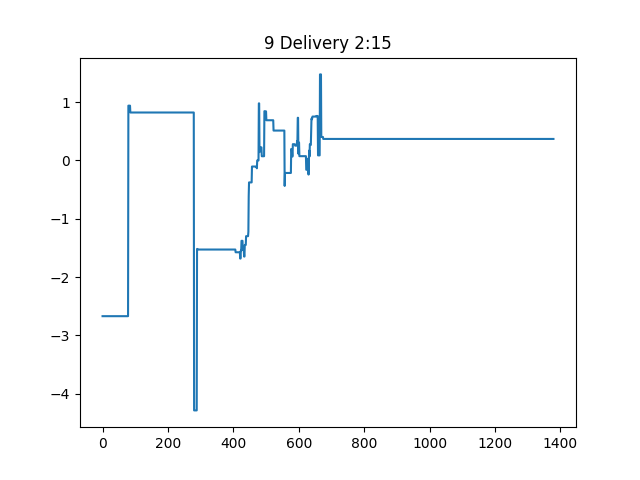

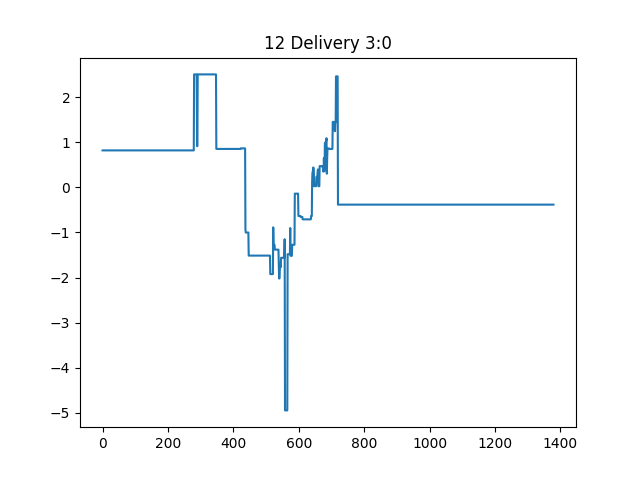

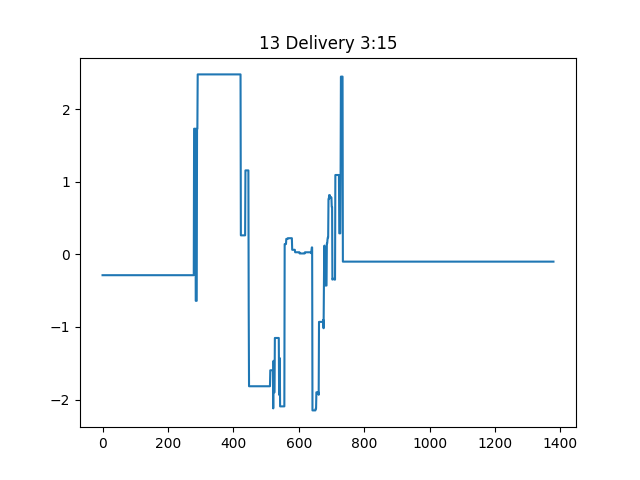

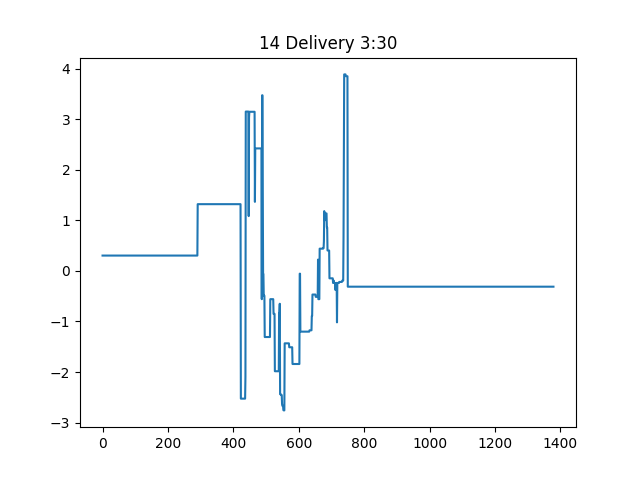

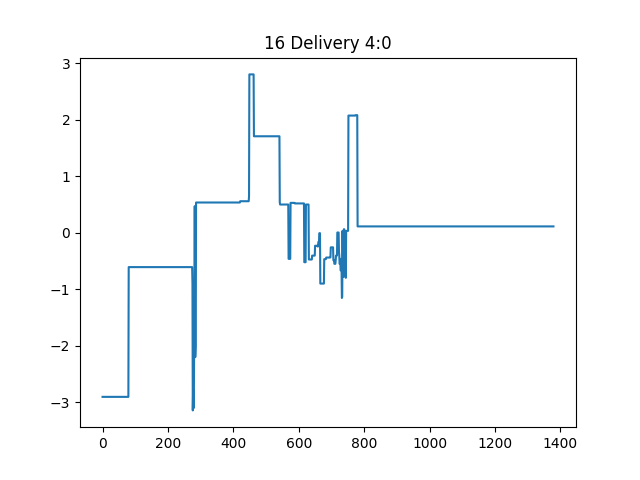

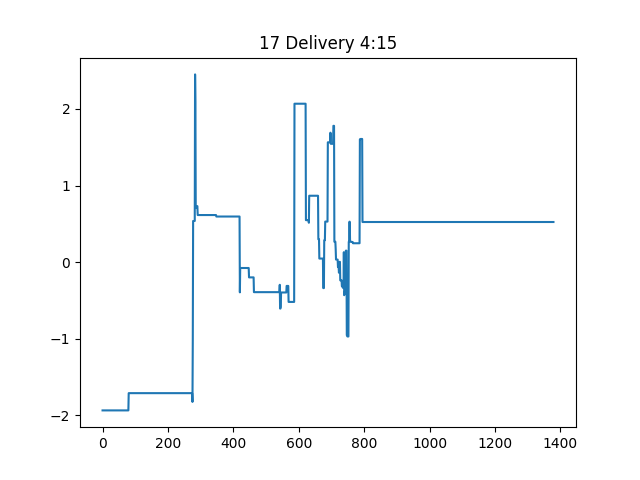

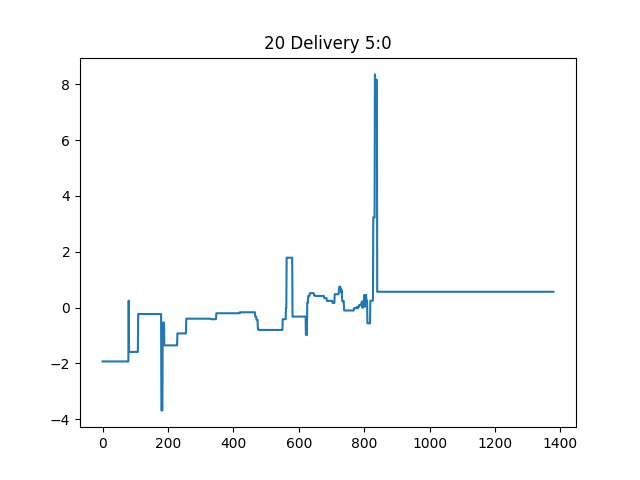

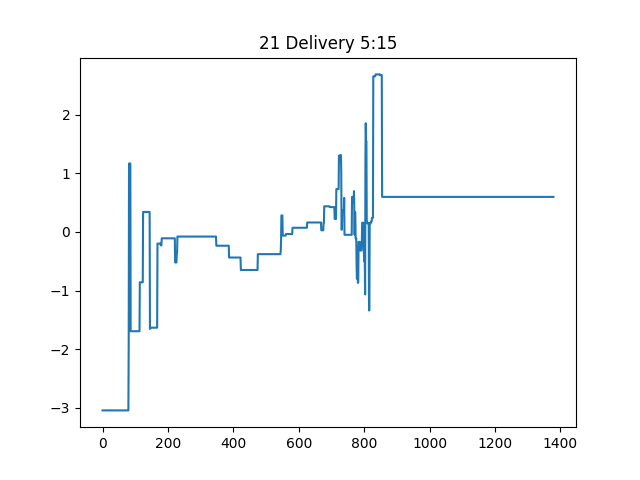

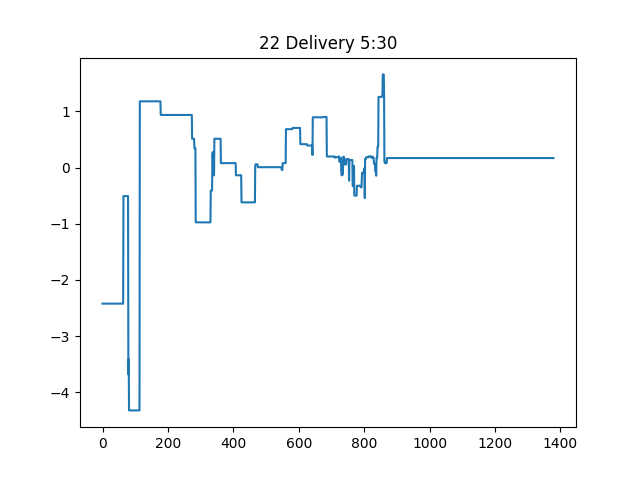

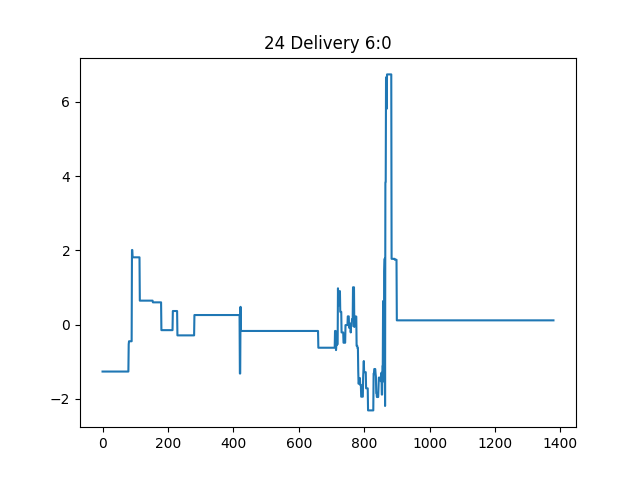

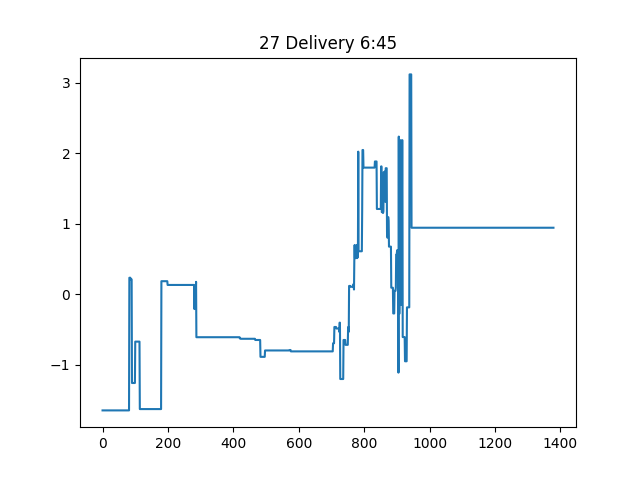

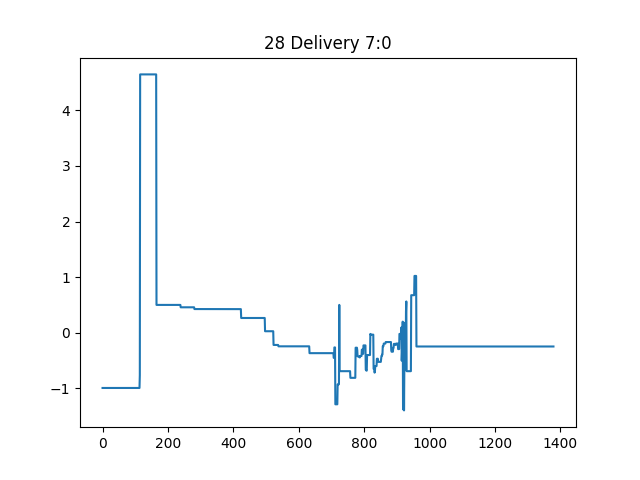

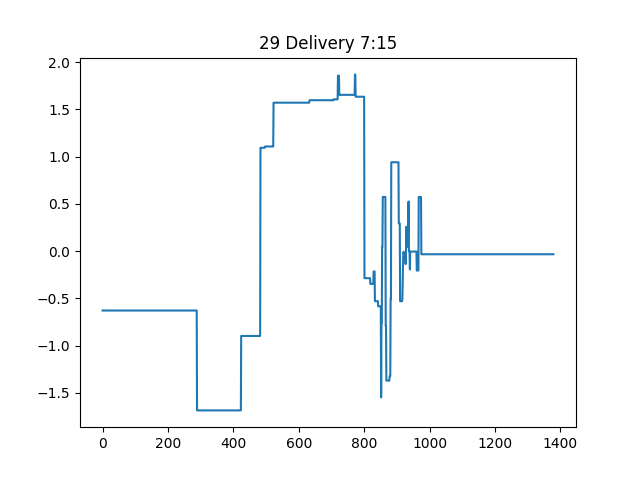

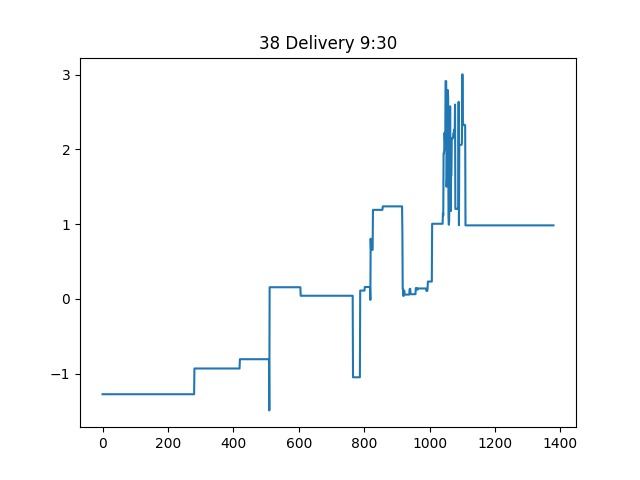

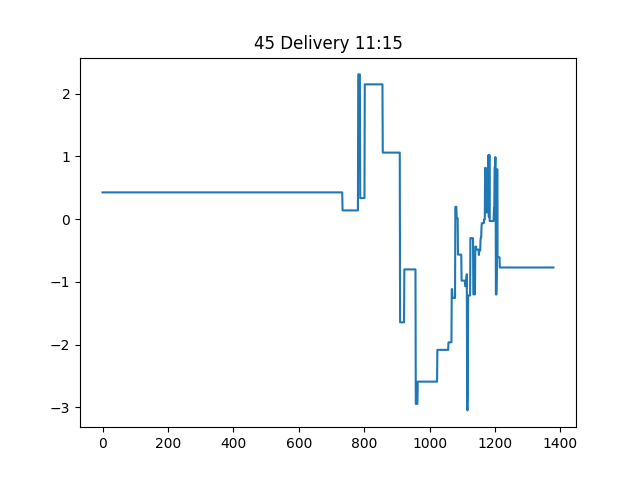

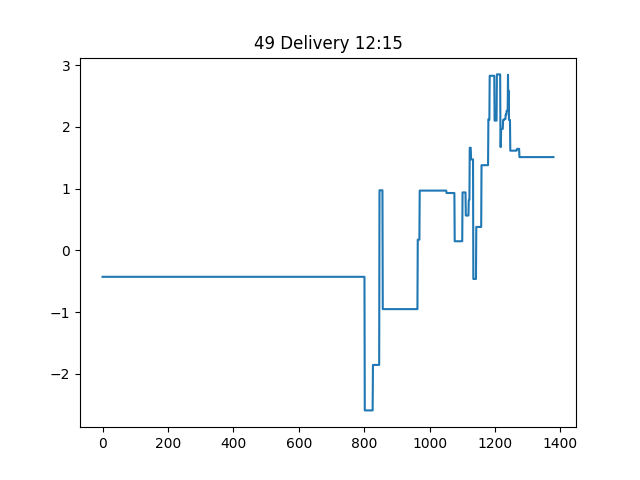

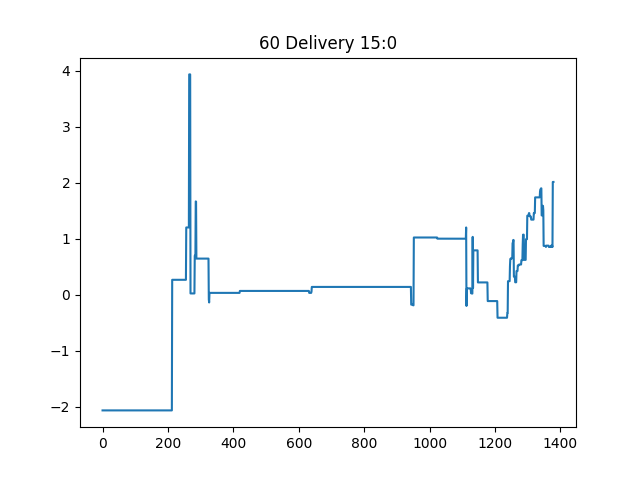

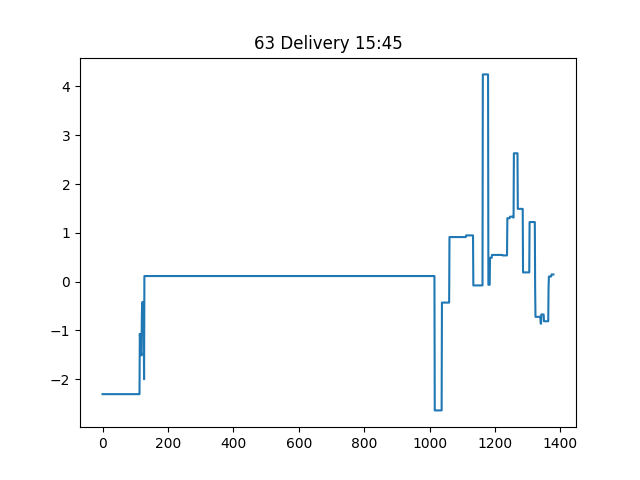

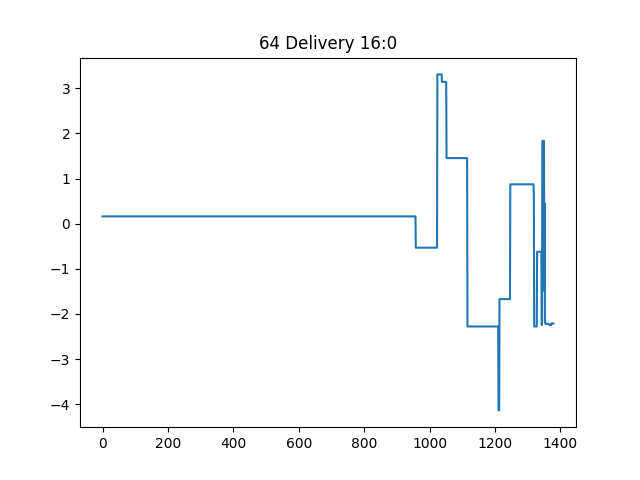

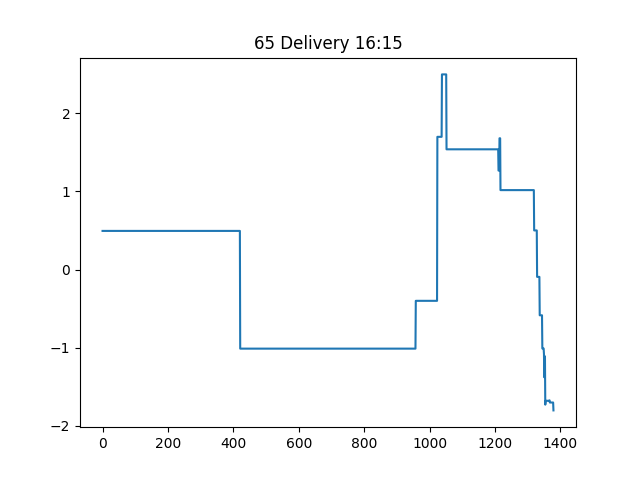

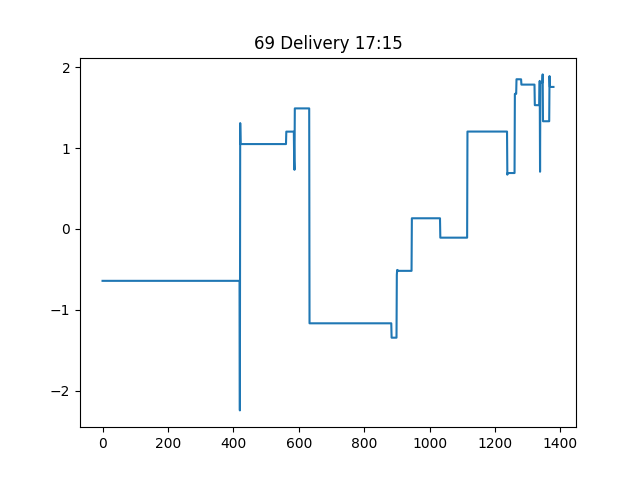

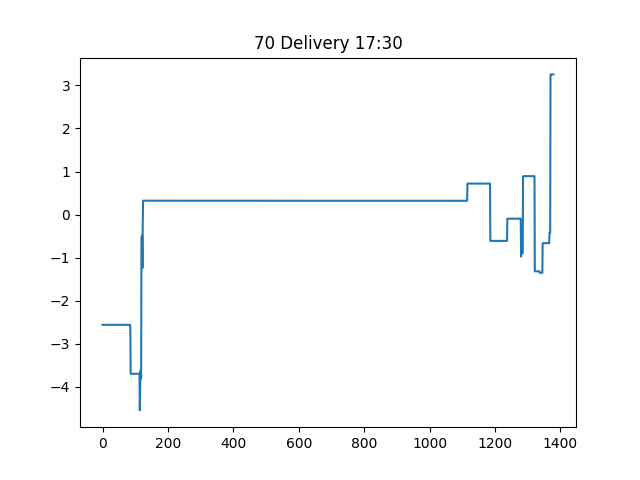

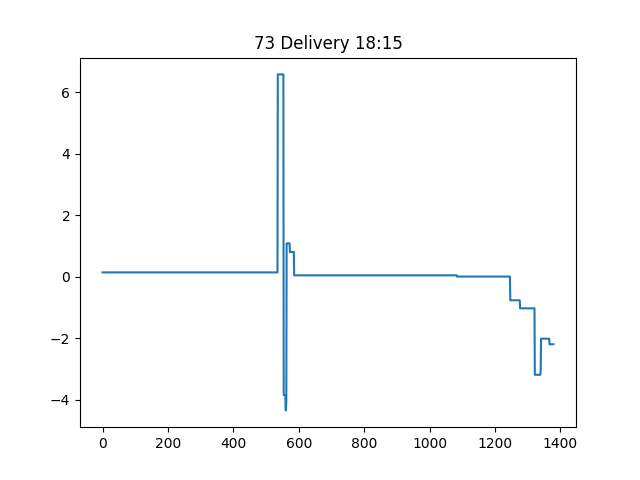

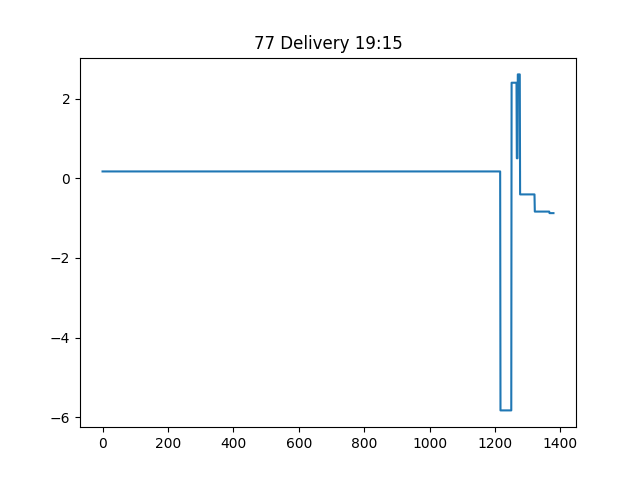

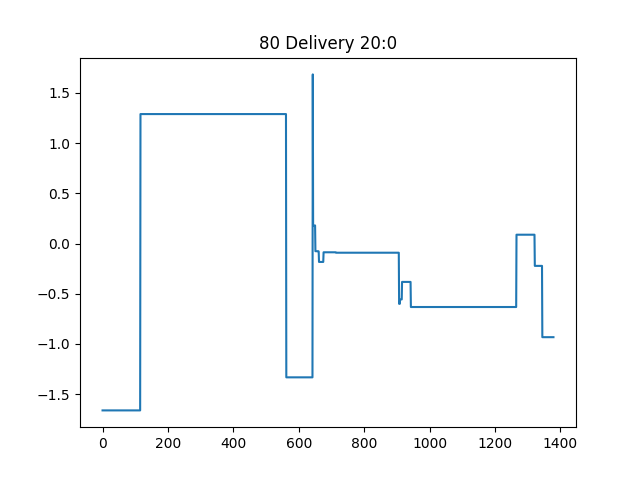

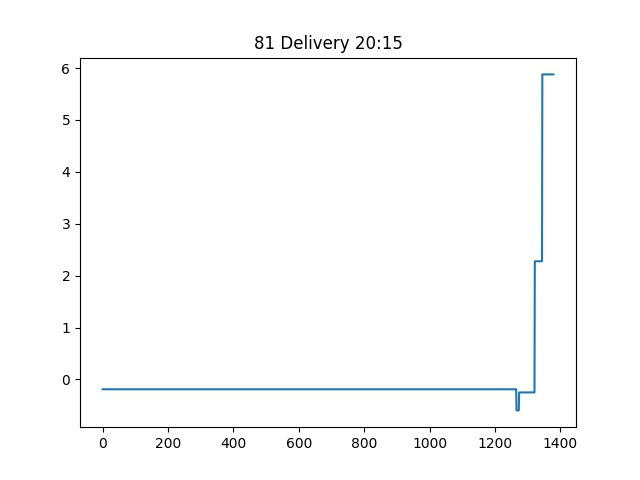

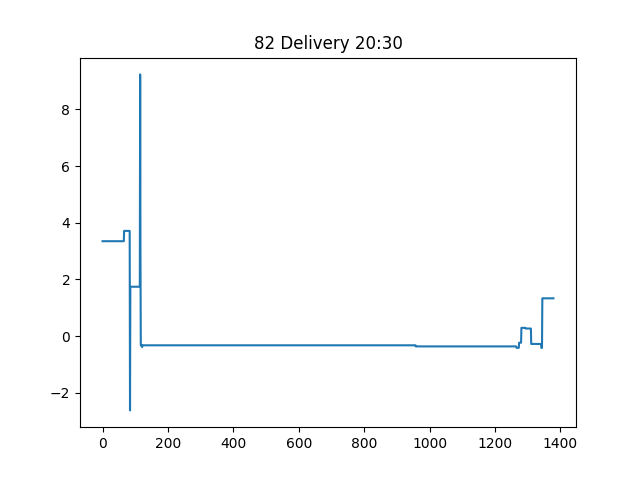

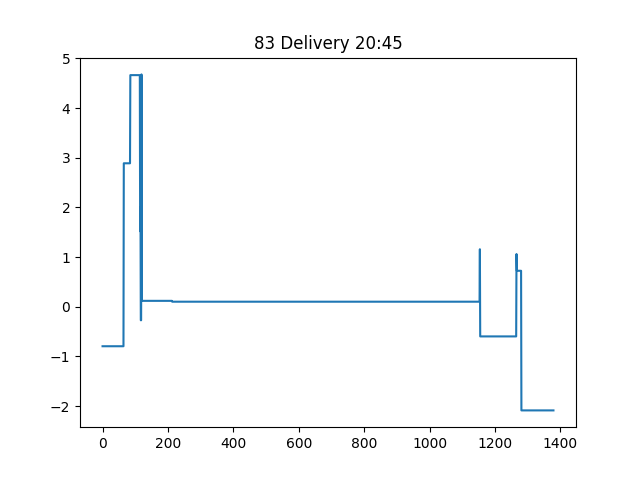

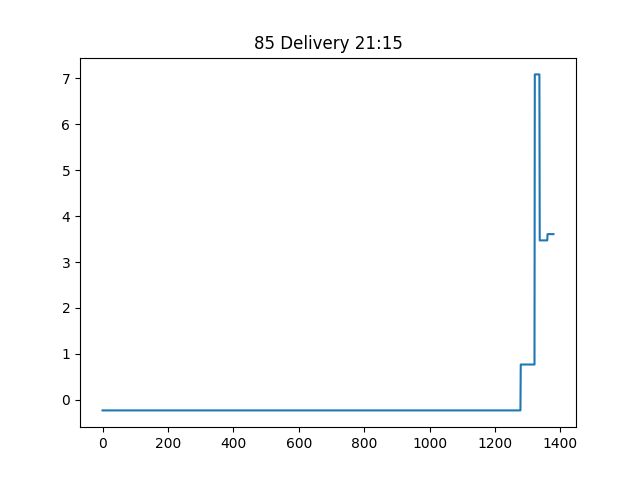

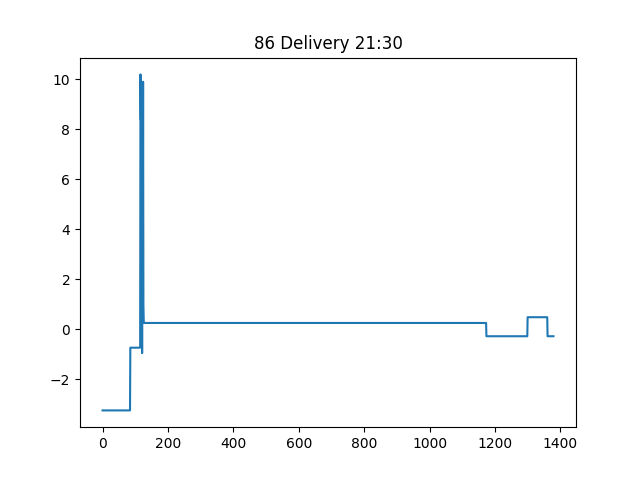

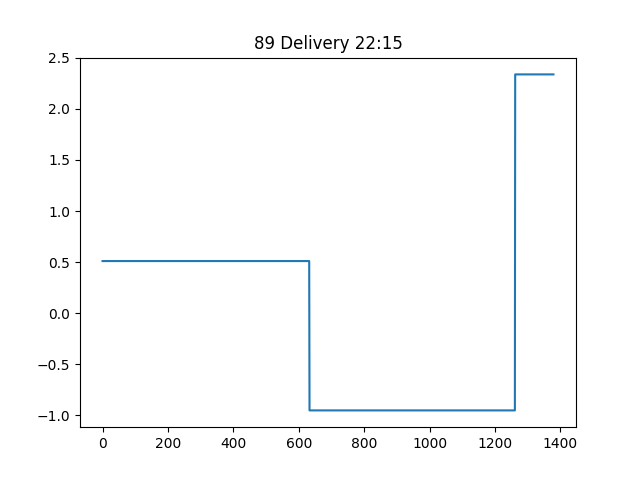

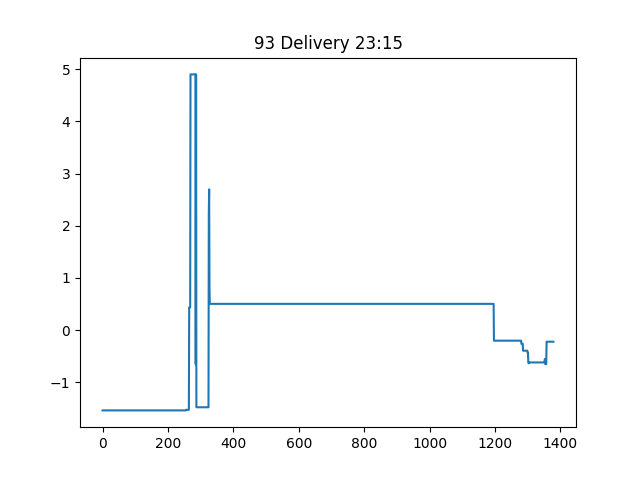

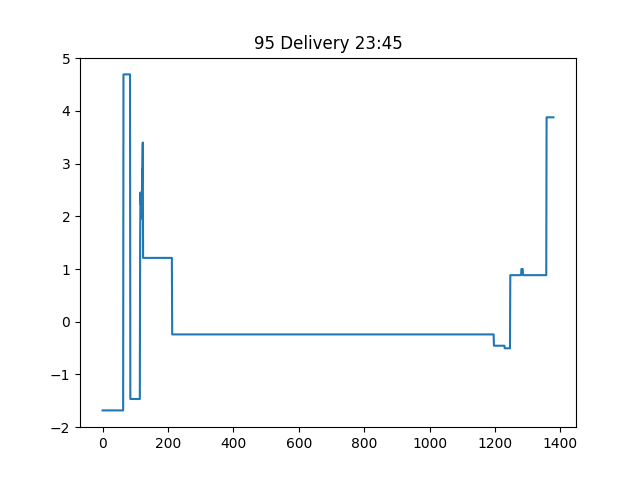

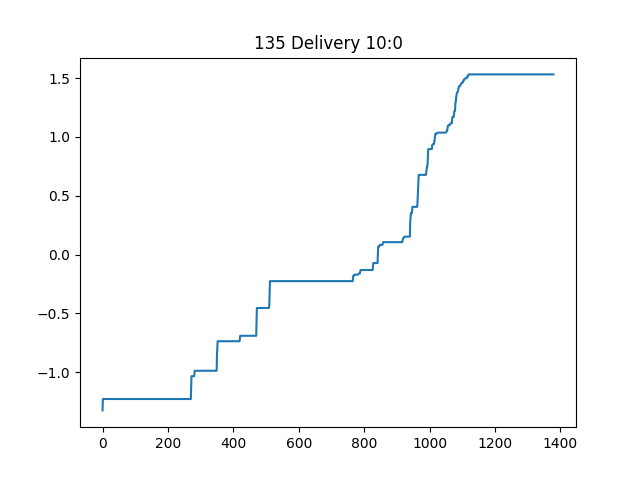

In [ ]:
for i in np.sort(df[1].unique()):
    plt.figure()
    plt.plot(X[:,i])
    if i <= 96:
        hour = (i*15)//60
        minutes = (i*15)/60 - hour
    else:
        hour = ((i - 95)*15)//60
        minutes = ((i - 95)*15)/60 - hour
    plt.title(f'{i} Delivery {hour}:{int(minutes*60)}')

## Analysis for all days


In [ ]:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

data = np.load(f'../Data/dense_nn_2020-01-01_volume_param.npy')

important_features_matrix = -1000*np.ones((np.shape(data)[0],pca_components))

for day in range(np.shape(data)[0]):

    X = data[day,:,:].T

    X = StandardScaler().fit_transform(X)

    model = PCA(n_components=pca_components).fit(X)
    X_pc = model.transform(X)

    # number of components
    n_pcs= model.components_.shape[0]

    # get the index of the most important feature on EACH component
    # LIST COMPREHENSION HERE
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

    initial_feature_names = np.arange(2*96)
    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df = pd.DataFrame(dic.items())

    most_important_features = np.sort(df[1])

    important_features_matrix[day,:] = most_important_features

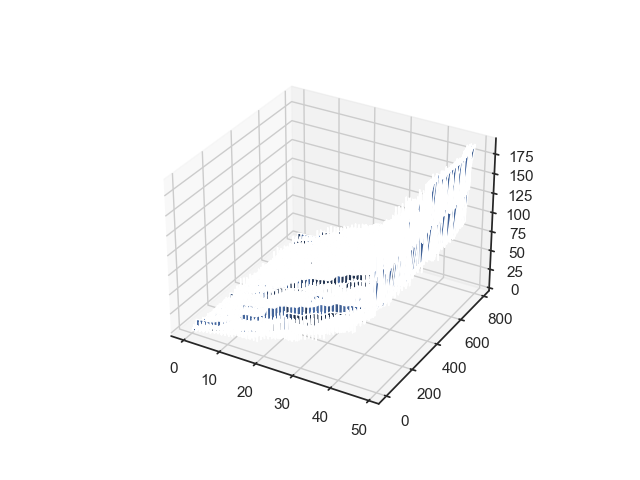

In [ ]:
plt.figure()
ax = plt.axes(projection="3d")

z  = important_features_matrix
y = np.arange(len(z))
x = np.arange(len(z[0]))

(x ,y) = np.meshgrid(x,y)

ax.plot_surface(x,y,z)
plt.show()

## Repeating the experiment on the differenced data


In [ ]:
forecasting_horizon = 120

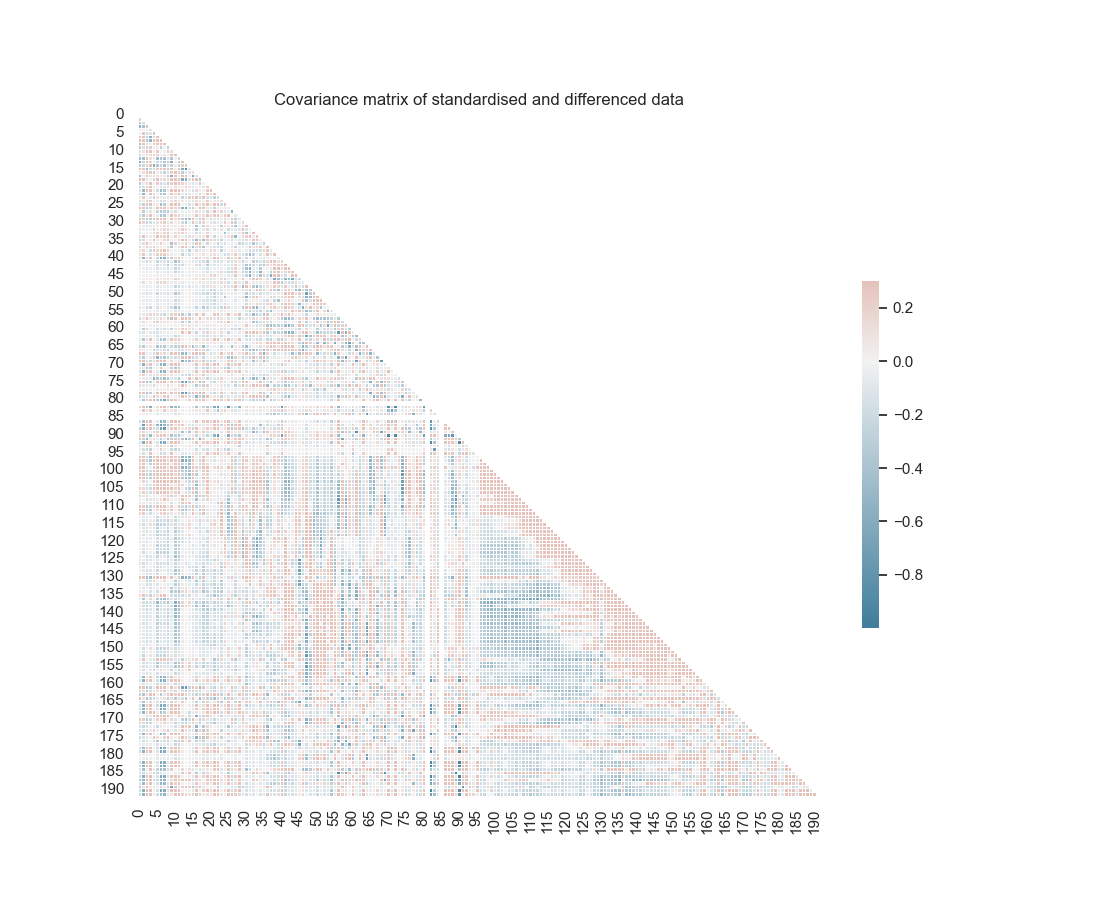

Text(0, 0.5, 'Explained Variaces')

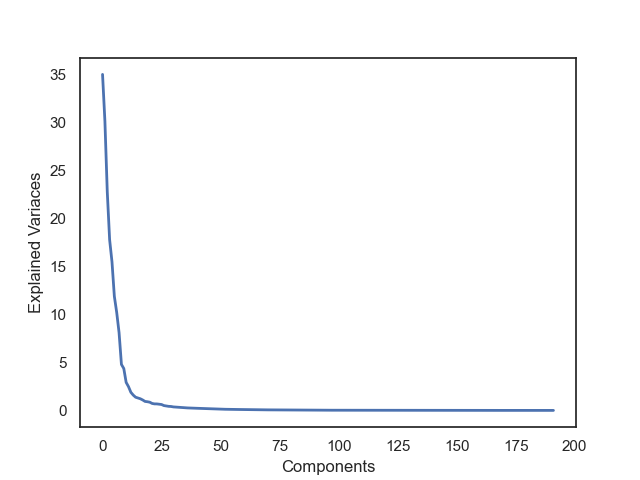

In [ ]:
data = np.load(f'../Data/dense_nn_2020-01-01_volume_param.npy')
data = data[:,:,20 + forecasting_horizon:-(20 + forecasting_horizon)] - data[:,:,:-2*(20 + forecasting_horizon)]
X = data[0,:,:].T
X = StandardScaler().fit_transform(X)
plot_correlation(X, names=np.arange(np.shape(X)[1]), quarter='Covariance matrix of standardised and differenced data')
pca = PCA(n_components=192)
pca.fit(X)
plt.figure()
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')

In [ ]:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

data = np.load(f'../Data/dense_nn_2020-01-01_volume_param.npy')

important_features_matrix_diff = -1000*np.ones((np.shape(data)[0],pca_components))

data = data[:,:,20 + forecasting_horizon:-(20 + forecasting_horizon)] - data[:,:,:-2*(20 + forecasting_horizon)]

for day in range(np.shape(data)[0]):

    X = data[day,:,:].T

    X = StandardScaler().fit_transform(X)

    model = PCA(n_components=pca_components).fit(X)
    X_pc = model.transform(X)

    # number of components
    n_pcs= model.components_.shape[0]

    # get the index of the most important feature on EACH component
    # LIST COMPREHENSION HERE
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

    initial_feature_names = np.arange(2*96)
    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df = pd.DataFrame(dic.items())

    most_important_features = np.sort(df[1])

    important_features_matrix_diff[day,:] = most_important_features

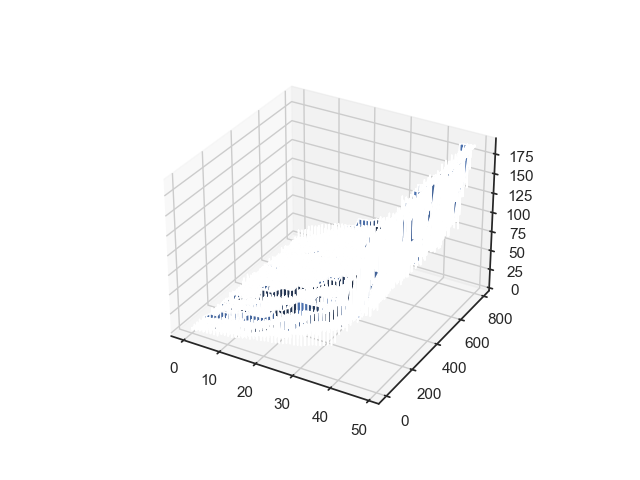

In [ ]:
%matplotlib widget
plt.figure()
ax = plt.axes(projection="3d")

z  = important_features_matrix_diff
y = np.arange(len(z))
x = np.arange(len(z[0]))

(x ,y) = np.meshgrid(x,y)

ax.plot_surface(x,y,z)
plt.show()

The results are similar, but we can see more volume variables in the differenced dataset.

## Features selection: basic selection based on the variance

In [ ]:
np.shape(data)

(791, 192, 1100)

In [ ]:
np.shape(np.expand_dims(np.sum(data[:,96:,:],1),1))

(791, 1, 1100)

In [ ]:
data = np.hstack((data[:,:96,:],np.expand_dims(np.sum(data[:,96:,:],1),1)))

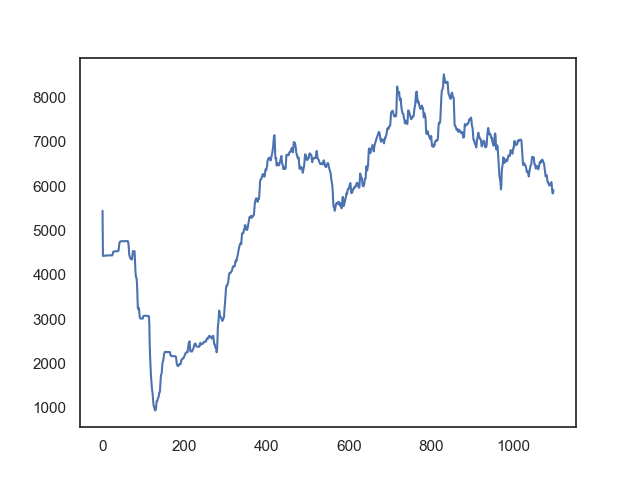

In [ ]:
plt.figure()
plt.plot(data[0,96,:])

In [ ]:
sel = VarianceThreshold(threshold=(.0))
data = np.load(f'../Data/dense_nn_2020-01-01_volume_param.npy')
data = data[:,:,20 + forecasting_horizon:-(20 + forecasting_horizon)] - data[:,:,:-2*(20 + forecasting_horizon)]

constant_data = []

for day in range(np.shape(data)[0]):
    X = data[day,:,:].T
    # X = StandardScaler().fit_transform(X)

    variances_arr = sel.fit(X).variances_
    constant_data.append(np.where(variances_arr == 0)[0])


This makes sense as we are forecasting delivery idx 60 (14:00) so it can happen that further deliveries were not traded yet.

In [ ]:
np.shape(X)

(1100, 192)

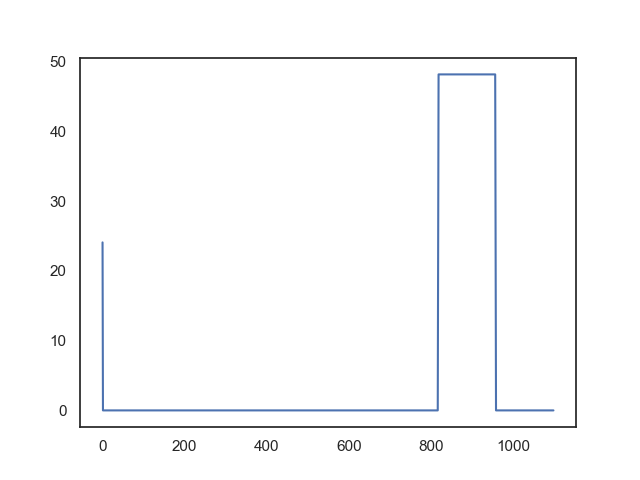

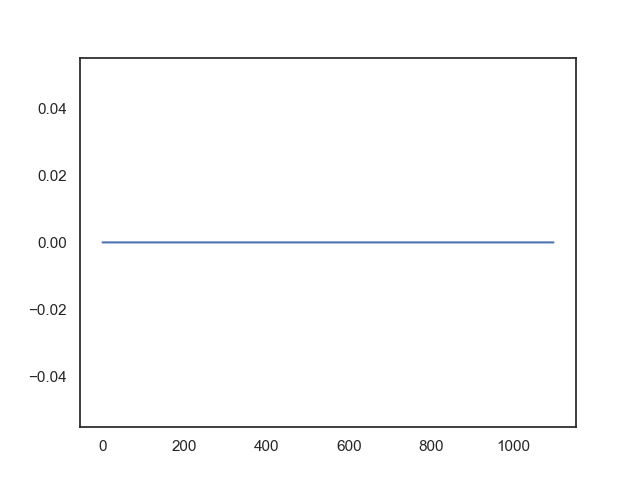

In [ ]:
idx = 81
day=0
plt.figure()
plt.plot(data[0,idx+96,:])

plt.figure()
plt.plot(data[0,idx,:])

In [ ]:
constant_data

[array([81, 85], dtype=int64),
 array([81, 85], dtype=int64),
 array([82, 84, 85, 87, 94], dtype=int64),
 array([78], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([85, 90, 93], dtype=int64),
 array([78, 82, 85, 86, 87, 90, 93], dtype=int64),
 array([], dtype=int64),
 array([78, 80, 81, 82, 84, 85, 86, 87, 89, 90, 93], dtype=int64),
 array([], dtype=int64),
 array([93], dtype=int64),
 array([], dtype=int64),
 array([82, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94], dtype=int64),
 array([84, 85, 87], dtype=int64),
 array([74, 77, 93], dtype=int64),
 array([], dtype=int64),
 array([85], dtype=int64),
 array([], dtype=int64),
 array([82], dtype=int64),
 array([92], dtype=int64),
 array([78, 82], dtype=int64),
 array([88, 89], dtype=int64),
 array([82], dtype=int64),
 array([], dtype=int64),
 array([65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 84, 85, 88,
        89], dtype=int64),
 array([85, 86, 93], dtype=i

In [ ]:
np.unique(np.concatenate(constant_data))

array([61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95], dtype=int64)

Conclusion: we MUST get rid of those variables in the training data. They are problematic numerically & do not give us any info. Moreover this is a hint that volume must be aggregated, i.e. all volue gathered as total sum at every minute.

Solution in training algorithms: exclude the columns dynamically, i.e. for currently forecasted day.

# TODO

1. run z dummies - done, dla LSTM wyniki o 5% lepsze po uśrednieniu prognozy naive i LSTMowej
2. run na dniach roboczych (tylko prog dni roboczych),
3. pca w 3d?
4. LASSO w różnych horyzontach (-6 do -0.5h horizon)
5. LOW PRIORITY W. Nitka - struct breaks do ważenia modeli

## Apply PCA to whole training window


In [ ]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib widget

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../Forecasting/')
from plot_correlation import plot_correlation

In [ ]:
X = np.load(f'../Data/dense_nn_2020-01-01_volume_param_dummies.npy')[:,:96,:]
X = X.reshape(np.shape(X)[0],np.prod(np.shape(X)[1:]))
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=700)
pca.fit(X)

PCA(n_components=700)

In [ ]:
pca.explained_variance_ratio_[:9].cumsum()

array([0.38164469, 0.46169462, 0.53016891, 0.59170225, 0.63187932,
       0.65596435, 0.67673812, 0.6962611 , 0.71128368])

(0.0, 100.0)

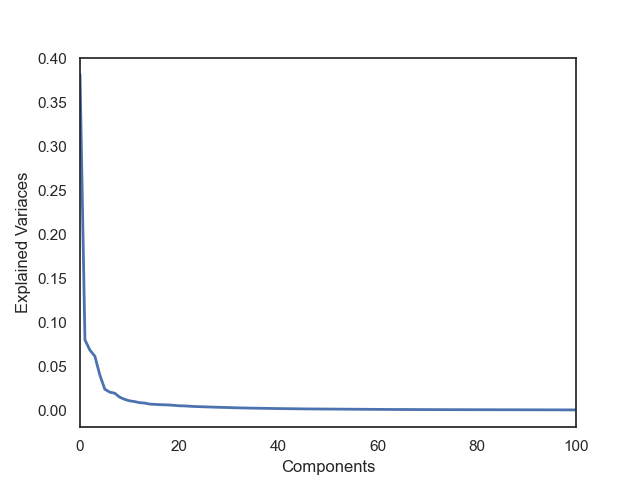

In [ ]:
plt.figure()
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.xlim([0,100])
# plt.ylim([0,30])

## Kernel PCA

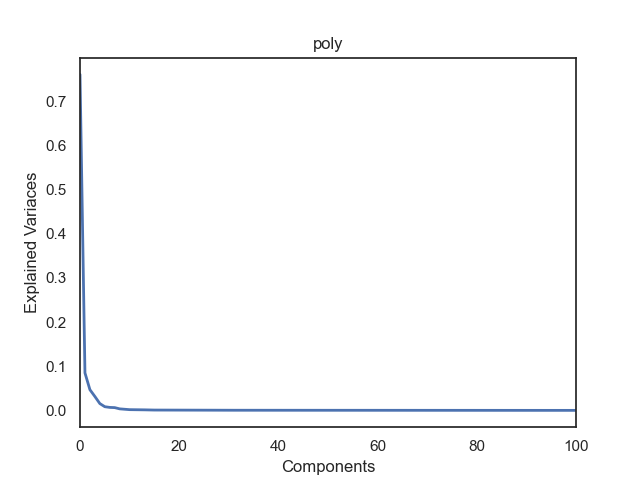

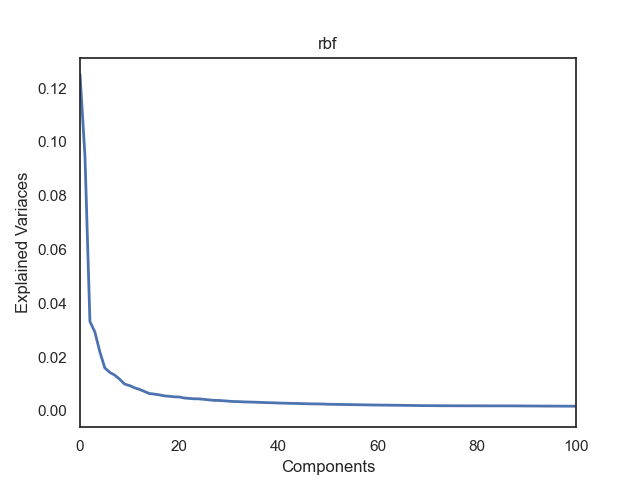

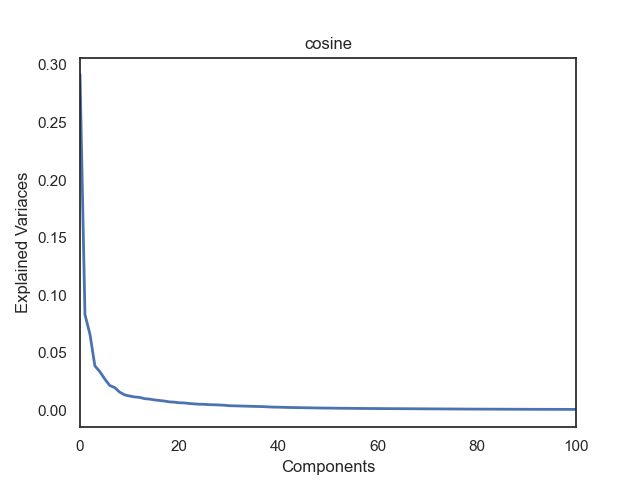

In [ ]:
X = np.load(f'../Data/dense_nn_2020-01-01_volume_param_dummies.npy')[:,:96,:]
X = X.reshape(np.shape(X)[0],np.prod(np.shape(X)[1:]))
X = StandardScaler().fit_transform(X)
kernel_names = ['poly', 'rbf', 'cosine']
for kernel_name in kernel_names:
    pca = KernelPCA(n_components=700,kernel=kernel_name)
    pca.fit(X)
    kpca_transform = pca.fit_transform(X)
    explained_variance = np.var(kpca_transform, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    plt.figure()
    plt.plot(explained_variance_ratio, linewidth=2)
    plt.xlabel('Components')
    plt.ylabel('Explained Variaces')
    plt.xlim([0,100])
    plt.title(kernel_name)
    # plt.ylim([0,30])

(0.0, 100.0)

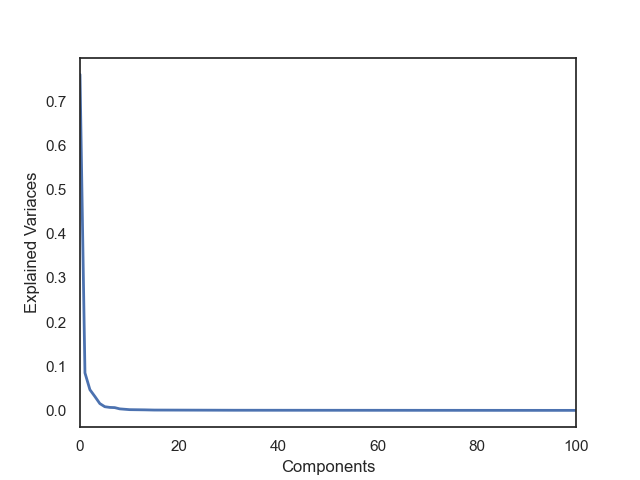

In [ ]:
X = np.load(f'../Data/dense_nn_2020-01-01_volume_param_dummies.npy')[:,:96,:]
X = X.reshape(np.shape(X)[0],np.prod(np.shape(X)[1:]))
X = StandardScaler().fit_transform(X)
pca = KernelPCA(n_components=700,kernel='poly')
pca.fit(X)
kpca_transform = pca.fit_transform(X)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.figure()
plt.plot(explained_variance_ratio, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.xlim([0,100])
# plt.ylim([0,30])

In [ ]:
explained_variance_ratio[:9].cumsum()

array([0.76117223, 0.84608805, 0.8929863 , 0.92450677, 0.93995679,
       0.94831485, 0.95510416, 0.96140862, 0.96489931])